### Made by Agni Keyoor Purani

All the codes are written in Python 3.8.10. Kindly excecute cells in order to make sure you get the expected behviour and an errorless output.

In [1]:
# Importing all the necessary modules and packages
import numpy as np
import matplotlib.pyplot as plt

# Ensuring that the output pdf has pdf images
# %config InlineBackend.figure_formats = ['pdf','png']
# %matplotlib inline

# Fibonacci series in log time
Now the fibonacci series can be calculated in $$O(\log(n))$$ by taking the power $n$ of the matrix 
$$F = \begin{bmatrix} 1 & 1 \\ 1 & 0\end{bmatrix}$$

In [2]:
# Defining the O(log(n)) algorithm for matrix power
def mat_pow(Mat, n):
    '''
    Calculates the matrix (Mat) to the input power n and 
    returns it. Uses O(log_2(n)) algorithm.
    '''
    if n == 1:
        return Mat
    
    if n % 2 == 0:
        return mat_pow(Mat, n//2) @ mat_pow(Mat, n//2)
        
    return mat_pow(Mat, n//2) @ mat_pow(Mat, n//2) @ Mat
 
# Defining the matrix to raised to n     
F = np.array([[1, 1],
              [1, 0]])

In [3]:
# Taking input from the user to find the n th fibonacci number
while True:
    try:
        n = int(input('Enter the value of n:'))
        if n < 1:
            raise ValueError
        break
    except ValueError:
        print("Give an integer >= 1.")

Enter the value of n:69


In [4]:
# Getting and printing the result
Result = mat_pow(F, n-1) @ np.array([[1],[0]])
Result = Result.squeeze()

# The nth term
print(f"The {n}th term in fibonacci series is", Result[0])
# Ratio up to 3 decimal places
print(f"The ratio of {n} and {n-1} term (upto 3 decimal) is", np.round(Result[0]/Result[1],3))

The 69th term in fibonacci series is 117669030460994
The ratio of 69 and 68 term (upto 3 decimal) is 1.618


# Gauss Jordan Elimination
We will use Gauss Jordan elimination to solve a system of linear equations as shown below:
\begin{eqnarray}
&& 2x_2 &&&+& x_4 &= 0 \\
2x_1 &+& 2x_2 &+& 3x_3 &+& 2x_4 &= -2 \\
4x_1 &-& 3x_2 &&&+& x_4 &= -7 \\
6x_1 &+& x_2 &-& 6x_3 &-& 5x_4 &= 6  \\
\end{eqnarray}

In [5]:
# Using the form Ax = B we define,
A = [[ 0.,  2.,  0.,  1.],
     [ 2.,  2.,  3.,  2.],
     [ 4., -3.,  0.,  1.],
     [ 6.,  1., -6., -5]]

B = [[0.],[-2.],[-7.],[6.]]

In [6]:
def gauss_jordan(A, B, stabilty=1e-6):
    '''
    Gauss Jordan Eliminations by row operations. I have used augmented matrix to 
    do all calculations in smaller and more compact code. It uses partial pivoting
    for extra stability (exchanges rows based on 'stability' factor).
    
    Solves for the equation Ax = B.
    
    Returns Result, Identity (to verify if its done correctly)
    '''
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)

    n = B.shape[0]
    
    # Solve for I and B simultaneously.
    A_new = np.hstack((A, B.reshape(n,1)))
    
    for k in range(n):
        # For using partial pivoting
        if A[k, k] < stabilty:
            # Get the max element as pivot for numerical stability
            i = np.argmax(A_new[:,k])
            A_new[[i,k],:] = A_new[[k,i],:]
    
        # Division by the pivot
        pivot = A_new[k, k]
        A_new[k, :] = A_new[k, :] / pivot

        # Using the row operation for elimination
        for i in range(n):
            if i == k:
                continue
            factor = A_new[i, k]
            A_new[i, :] = A_new[i, :] - factor * A_new[k, :]

    return A_new[:,-1], A_new[:,:n]

In [7]:
Res, I = gauss_jordan(A, B)
# print(I) # To check if it works
# The above line is commented just for your reference

for i in range(Res.size):
    print(f"x{i+1} = {np.round(Res[i],5)}")

x1 = -0.5
x2 = 1.0
x3 = 0.33333
x4 = -2.0


# Parametric Plots
We have to make a parametric plot for 
$$ r = \theta^2 $$

In [8]:
# Defining the polar coordinates
N = 10000 # number of points for discretization
theta = np.linspace(0., 10.*np.pi, N)
r = theta ** 2

In [9]:
# Converting them to cartesian so that its possible to plot
x = r * np.cos(theta)
y = r * np.sin(theta)

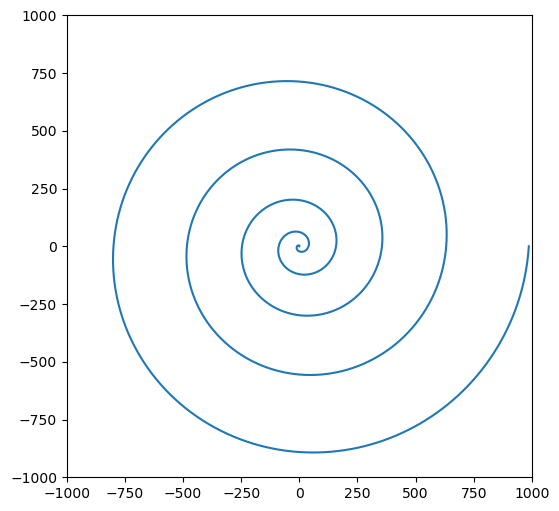

In [10]:
# Plotting the figure shape
fig, ax = plt.subplots(figsize=(6,6)) # for square frame
plt.plot(x, y)

# Display the graph nicely
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.show()

# Comparision of CPU times for matrix multiplication
Given the below matrix we have to multiply them without any direct inbuilt functioanily in python for it. 
$$ A_{ij} = (i+1)\times(j+1) $$
$$ B_{ij} = i + j $$

We could easily have a closed form solution, or implement a general matrix multiplication code (using 3 loops or Strassen's algorithm). The close form solution is (summed over k)
\begin{align}
C_{ij} &= (i + 1)(k + 1)(k+j)\\
&= (i+1)(k^2 +(j+1)k+j) \\
C_{ij} &= (i+1) \left( \frac{n(n-1)(2n-1)}{6} + (j+1)\frac{n(n-1)}{2} + nj \right)
\end{align}

In [11]:
# Taking input from the user to make nth matrix
while True:
    try:
        n = int(input('Enter the value of n:'))
        if n < 1:
            raise ValueError
        break
    except ValueError:
        print("Give an integer >= 1.")
        
# Generates the A and B matrix
grid = np.indices((n, n)) # Generates the row and column indices
A = (grid[0] + 1) * (grid[1] + 1)
B = grid[0] + grid[1]

Enter the value of n:1024


In [12]:
# Closed form solution
def direct_mul(n):
    '''
    Directly finds out result for a particular n.
    '''
    
    C = (grid[0]+1)*((n *(n-1)*(2*n - 1) // 6) + (grid[1]+1) * (n*(n-1)) // 2 + n*grid[1])
    return C
    


%time print(direct_mul(n))

[[   357913600    358438400    358963200 ...    893734400    894259200
     894784000]
 [   715827200    716876800    717926400 ...   1787468800   1788518400
    1789568000]
 [  1073740800   1075315200   1076889600 ...   2681203200   2682777600
    2684352000]
 ...
 [365787699200 366324044800 366860390400 ... 913396556800 913932902400
  914469248000]
 [366145612800 366682483200 367219353600 ... 914290291200 914827161600
  915364032000]
 [366503526400 367040921600 367578316800 ... 915184025600 915721420800
  916258816000]]
CPU times: user 9.31 ms, sys: 4.75 ms, total: 14.1 ms
Wall time: 12.4 ms


In [13]:
# Normal multiplication
def multiply(A, B):
    '''
    The standard 3 loops of matrix multiplication.
    '''
    n = B.shape[0]
    
    C=np.zeros((n, n),dtype=int)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C


%time print(multiply(A, B))

[[   357913600    358438400    358963200 ...    893734400    894259200
     894784000]
 [   715827200    716876800    717926400 ...   1787468800   1788518400
    1789568000]
 [  1073740800   1075315200   1076889600 ...   2681203200   2682777600
    2684352000]
 ...
 [365787699200 366324044800 366860390400 ... 913396556800 913932902400
  914469248000]
 [366145612800 366682483200 367219353600 ... 914290291200 914827161600
  915364032000]
 [366503526400 367040921600 367578316800 ... 915184025600 915721420800
  916258816000]]
CPU times: user 6min 10s, sys: 145 ms, total: 6min 10s
Wall time: 6min 12s


In [14]:
# Strassen's Algorithm
def strassen_multiply(A, B):
    '''
    Uses the Straseen's Algoritm.
    '''
    n = B.shape[0]
    
    if A.size == 1 or B.size == 1:
        return A * B
    
    # If n is not divisible 2 we add padding so we can split
    if n % 2 == 1:
        A = np.pad(A, (0, 1), mode='constant')
        B = np.pad(B, (0, 1), mode='constant')
        m = (n+1) // 2
    else:
        m = n // 2

    # Splitting the matrix into 8 equal matrices
    a = A[:m, :m]
    b = A[:m, m:]
    c = A[m:, :m]
    d = A[m:, m:]
    e = B[:m, :m]
    f = B[:m, m:]
    g = B[m:, :m]
    h = B[m:, m:]
    
    # The recursive O(n^log_2(7))
    p1 = strassen_multiply(a, f - h)
    p2 = strassen_multiply(a + b, h)
    p3 = strassen_multiply(c + d, e)
    p4 = strassen_multiply(d, g - e)
    p5 = strassen_multiply(a + d, e + h)
    p6 = strassen_multiply(b - d, g + h)
    p7 = strassen_multiply(a - c, e + f)
    result = np.zeros((2 * m, 2 * m), dtype=int)
    
    result[:m, :m] = p5 + p4 - p2 + p6
    result[:m, m:] = p1 + p2
    result[m:, :m] = p3 + p4
    result[m:, m:] = p1 + p5 - p3 - p7

    # Returning the nxn matrix as we could have added padding
    return result[:n, :n]

%time print(strassen_multiply(A, B))

[[   357913600    358438400    358963200 ...    893734400    894259200
     894784000]
 [   715827200    716876800    717926400 ...   1787468800   1788518400
    1789568000]
 [  1073740800   1075315200   1076889600 ...   2681203200   2682777600
    2684352000]
 ...
 [365787699200 366324044800 366860390400 ... 913396556800 913932902400
  914469248000]
 [366145612800 366682483200 367219353600 ... 914290291200 914827161600
  915364032000]
 [366503526400 367040921600 367578316800 ... 915184025600 915721420800
  916258816000]]
CPU times: user 7min 12s, sys: 375 ms, total: 7min 12s
Wall time: 7min 15s


We see closed form solution is obviously the fastest and then come the strassen. But for the low n the stardard 3 loop multiplication is faster.

# QR decomposition
We have to solve the following system using QR decomposition.
$$
\begin{bmatrix}
2 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
\end{bmatrix} = 
\begin{bmatrix}
-4\\
3\\
9\\
7\\
\end{bmatrix}
$$

In [15]:
# Defining the matrix considering Ax = B
A = [[ 2.,  1.,  4.,  1.],
     [ 3.,  4., -1., -1.],
     [ 1., -4.,  1.,  5.],
     [ 2., -2.,  1.,  3]]

B = [[-4.],[3.],[9.],[7.]]

In [16]:
def QR_Decomposition(A):
    '''
    QR decomposition of A. That is A is decomposed into an orthogonal matrix Q and 
    an right triangular matrix R using the Gram Schmidt process.
    '''
    A = np.array(A, dtype=float)
    Q = np.copy(A)
    _, n = A.shape

    temp_norm = np.linalg.norm(Q[:, 0])
    Q[:, 0] = Q[:, 0] / temp_norm
    for j in range(1, n):
        for i in range(j):
            Q[:, j] = Q[:, j] - proj(A[:, j], Q[:, i]).reshape((1, -1))
        Q[:, j] = Q[:, j] / np.linalg.norm(Q[:, j])
    R = Q.T @ A
    return Q, R


def proj(x, y):
    '''
    Gives projection of x onto y.
    '''
    x = np.copy(x)
    y = np.copy(y)

    x = x.squeeze()
    y = y.squeeze()
    ans = np.sum(x * y) / (np.linalg.norm(y)**2) * y

    return ans

In [17]:
def soln(R, B):
    '''
    Solves the System Rx = B using bottom up approach and returns the result.
    where R is an upper triangle matrix.
    '''
    B = np.array(B, dtype=float)
    Solution = np.copy(B)
    n = B.size
    
    # Now we start from the end and solve for B
    for i in range(n-1,-1,-1):
        Solution[0:i,0] -= (Solution[i,0] * R[0:i,i] / R[i,i])
        Solution[i] /= R[i,i]
    
    return Solution

In [18]:
Q, R = QR_Decomposition(A)
Soln = soln(R, Q.T @ B)

for i in range(Soln.size):
    print(f"x{i+1} = {np.round(Soln[i],5)}")

x1 = [2.]
x2 = [-1.]
x3 = [-2.]
x4 = [1.]


# Contour plot of a potential (without contour plot function)
Given the potential function
$$ U = \frac{1}{2} \left ( x^2 + y^2 \right ) $$
we have to plot 5 equipotential surface (contours, which are circles in this case) and show that its gradient is perpendicular to it.

In [19]:
def U(x, y):
    '''
    The potential function defined for the 6th question.
    '''
    
    return 0.5 * (x ** 2 + y ** 2)

def grad(x, y, func, h=1e-12):
    '''
    Find out the gradient of 2D cartesian function 'func'.
    '''
    grad_x = (func(x+h,y) - func(x-h,y)) / (2. * h)
    grad_y = (func(x,y+h) - func(x,y-h)) / (2. * h)
    
    return grad_x, grad_y
        

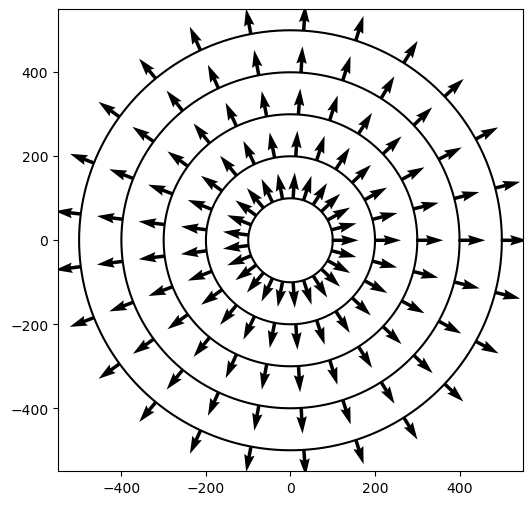

In [20]:
N = 10000
GradN = 25 # Number of points to calculate gradient in a contour
skips = N // GradN
indices = np.arange(0, N, skips, dtype=int)
GradN = indices.size
theta = np.linspace(0, 2*np.pi, N) # for the circle
U_vals = [50, 100, 150, 200, 250] # The values of potetial for equipotential surface

# Plotting the figure shape
fig, ax = plt.subplots(figsize=(6,6)) # for square frame

for u in U_vals:
    # Getting the values of the coordinates for finding gradient
    x = 2. * u * np.cos(theta)
    y = 2. * u * np.sin(theta)
    x_g = np.zeros(GradN)
    y_g = np.zeros(GradN)
    x_g = x[indices]
    y_g = y[indices]
    
    # Calculating the gradients
    grad_x, grad_y = grad(x_g, y_g, U)
    
    # Plotting the surface and then the gradients
    plt.plot(x, y, 'k-')
    plt.quiver(x_g, y_g, grad_x, grad_y)
    
plt.show()

# Roots using bisection method
We have to find the roots of
$$ \tan(za) = 2 \frac{\sqrt{\left(\frac{z_0}{z}\right)^2 -1}}{\left[ 2 - \frac{z_0}{z}^2 \right]} $$
for $z_0 = 10$ and $a = 1$.

From the value of $z$ the energies are given by
$$ E = z^2 - z_0^2 $$ 
in the units of $\hbar/2m$


In [21]:
# The constants
a = 1.
z0 = 10.

def LHS(z):
    '''
    Returns the LHS of the equation whose roots we want to find.
    '''
    
    return np.tan(a * z)

def RHS(z):
    '''
    Returns the LHS of the equation whose roots we want to find.
    '''
    frac_term = z0 / z
    
    # Numerator
    num = np.sqrt(frac_term ** 2 - 1)
    # Denominator
    dem = 2 - frac_term ** 2
    
    return 2. * num / dem

def func(z):
    '''
    Returns the the equation whose roots we want to find.
    '''
    
    return LHS(z) - RHS(z)

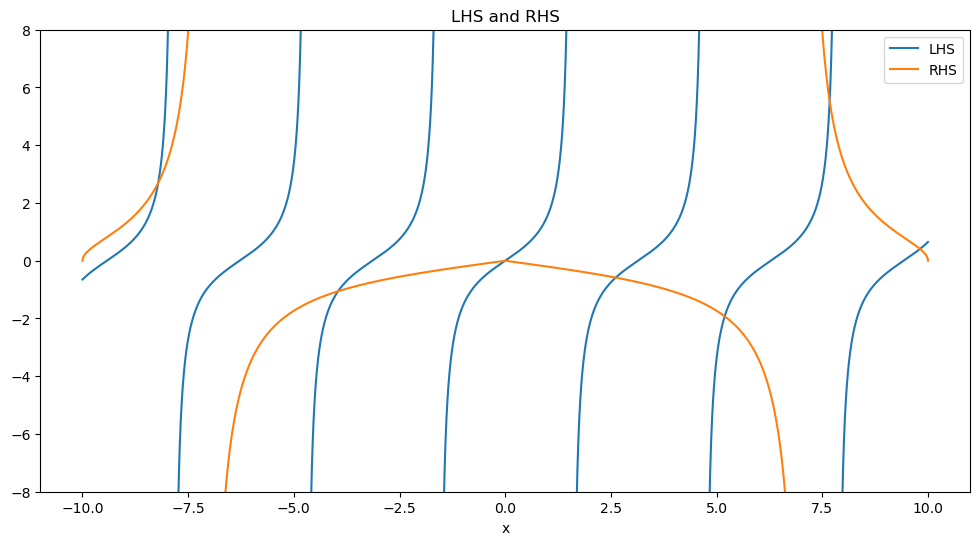

In [22]:
# Plotting LHS and RHS to guess solutions of func(z)
N = 10000 # Number of discreate points.
# 0 generates a divide by 0 error, so we start with a slightly larger value
z = np.linspace(-z0, z0, N)
LHSy = LHS(z)
LHSy[:-1][np.diff(LHSy) < 0] = np.nan # Ensures that there is no line joining inf to -inf

#f
RHSy = RHS(z)
s = slice(0, N//2-2)
sd = slice(0, N//2-1)
RHSy[s][np.diff(RHSy[sd]) < 0] = np.nan # Ensures that there is no line joining inf to -inf
s = slice(N//2+2, -1)
sd = slice(N//2+1, -1)
RHSy[s][np.diff(RHSy[sd]) > 0] = np.nan # Ensures that there is no line joining -inf to inf

fig, ax = plt.subplots(figsize=(12,6)) # for nice frame

plt.plot(z, LHSy, label='LHS')
plt.plot(z, RHSy, label='RHS')

plt.ylim([-8,8]) # As tan is not bounded in the interval
plt.title('LHS and RHS')
plt.xlabel('x')
plt.legend()
plt.show()

We can now decide the interctions as roots so for the roots we take the intervals to be 
- $[2,3]$
- $[-4.5,-3.5]$
- $[5,6]$

Note that 0 is also a root but the energy energy corresponding to that is no state at all. So the first 3 roots would give that energies

In [23]:
def bisection(search_interval, func, MaxSteps=50, acc=1e-15):
    '''
    The bisection method to find the roots of function 'func' in the interval start to end.
    If no root is found none is returened. with the accuracy of acc in MaxSteps.
    '''
    assert len(search_interval) == 2
    
    z = acc + 1
    steps = 0
    
    start, end = search_interval
    
    while z > acc:
        mid = (start + end) / 2.
        if func(start) * func(mid) > 0:
            start = mid
        elif func(end) * func(mid) > 0:
            end = mid
        else:
            return mid

        z = np.fabs((start - end) / (start + end))
        steps += 1
        
        if steps > MaxSteps:
            return None
        
    return mid

In [24]:
# Finding the roots
search_root_ranges = [[2, 3], [-4.5, -3.5], [5,6]]
roots = []
energies = []

for interval in search_root_ranges:
    root = bisection(interval, func)
    roots.append(root)
    energies.append(root ** 2 - z0 ** 2)

print('List of roots:')
print('---------------------------------')
for i in range(len(roots)):
    print(f'Root {i+1}: {roots[i]:6.3f} \t Energy {i+1}: {energies[i]:6.2f}')
    

List of roots:
---------------------------------
Root 1:  2.613 	 Energy 1: -93.17
Root 2: -3.955 	 Energy 2: -84.36
Root 3:  5.191 	 Energy 3: -73.05
